In [3]:
!pip install pymatgen mp-api

In [4]:
pip install mp-api --upgrade

Note: you may need to restart the kernel to use updated packages.


# MP cuprates Superconductors

In [5]:
# Load the data
import pandas as pd
file_path = r"C:\Users\Kered\GAN_Mastery\02_labs\crystals_gan\dataset\Cuprate_3DSC_MP.csv"  # Update to your file path if needed
data = pd.read_csv(file_path)

# Remove duplicate rows based on the 'material_id_2' column
filtered_dataset = data.drop_duplicates(subset=['material_id_2'])

# Save the filtered DataFrame to a new CSV file
output_file = r"C:\Users\Kered\GAN_Mastery\02_labs\crystals_gan\dataset\Filtered_Cuprate_3DSC_MP_fin.csv"
filtered_dataset.to_csv(output_file, index=False)

print(f"Filtered data saved to {output_file}")

Filtered data saved to C:\Users\Kered\GAN_Mastery\02_labs\crystals_gan\dataset\Filtered_Cuprate_3DSC_MP_fin.csv


In [6]:
filtered_dataset['material_id_2']
MP_list = filtered_dataset['material_id_2'].to_list()
len(MP_list)

161

In [7]:
MP_list

['mp-1227852',
 'mp-1198030',
 'mp-1214529',
 'mp-14970',
 'mp-10350',
 'mp-1214336',
 'mp-1214316',
 'mp-1077929',
 'mp-1025280',
 'mp-1218170',
 'mp-1227458',
 'mp-1228381',
 'mp-6790',
 'mp-20674',
 'mp-22719',
 'mp-21451',
 'mp-20942',
 'mp-505315',
 'mp-20936',
 'mp-6205',
 'mp-15039',
 'mp-19813',
 'mp-20897',
 'mp-1214613',
 'mp-1214720',
 'mp-1182677',
 'mvc-11834',
 'mp-542733',
 'mp-6027',
 'mp-22215',
 'mp-6583',
 'mp-6710',
 'mp-1228402',
 'mp-654374',
 'mp-6885',
 'mp-632802',
 'mp-6879',
 'mp-22601',
 'mp-1228620',
 'mp-6691',
 'mp-1228495',
 'mp-1228449',
 'mp-1214711',
 'mp-1214699',
 'mp-1214814',
 'mp-1214652',
 'mp-1214600',
 'mp-1214590',
 'mp-1214586',
 'mp-1214571',
 'mp-6562',
 'mp-1228447',
 'mp-557043',
 'mp-616471',
 'mp-1228503',
 'mp-1214654',
 'mp-1214655',
 'mp-1228227',
 'mp-622110',
 'mp-1228601',
 'mp-622211',
 'mp-1228334',
 'mp-1214572',
 'mp-1228407',
 'mp-6616',
 'mp-1228253',
 'mp-622210',
 'mp-1228451',
 'mp-20324',
 'mp-1228202',
 'mp-1228182',
 

In [8]:
# !pip uninstall mp-api emmet-core pydantic -y
# !pip install mp-api==0.30.10 pydantic==1.10.12

In [9]:
import os
from mp_api.client import MPRester  # << NEW import!

# Your Materials Project API key
API_KEY = "aazVD90xN8nU3R4xdWoVIF8uEPRJJUV2"

# List of material IDs
material_ids = ['mp-1227852','mp-1198030','mp-1214529','mp-14970', 'mp-10350','mp-1214336','mp-1214316','mp-1077929','mp-1025280',
 'mp-1218170','mp-1227458','mp-1228381', 'mp-6790','mp-20674', 'mp-22719','mp-21451', 'mp-20942','mp-505315',
 'mp-20936','mp-6205','mp-15039','mp-19813','mp-20897','mp-1214613','mp-1214720','mp-1182677','mvc-11834',
 'mp-542733','mp-6027','mp-22215','mp-6583','mp-6710','mp-1228402','mp-654374','mp-6885','mp-632802', 'mp-6879',
 'mp-22601','mp-1228620','mp-6691','mp-1228495','mp-1228449','mp-1214711','mp-1214699','mp-1214814','mp-1214652',
 'mp-1214600','mp-1214590','mp-1214586','mp-1214571','mp-6562','mp-1228447','mp-557043','mp-616471','mp-1228503',
 'mp-1214654','mp-1214655','mp-1228227','mp-622110','mp-1228601','mp-622211','mp-1228334','mp-1214572',
 'mp-1228407','mp-6616','mp-1228253','mp-622210','mp-1228451', 'mp-20324','mp-1228202','mp-1228182',
 'mp-1228206','mp-1214585','mp-1214650','mp-622108','mp-6779','mp-1214709','mp-1228680','mp-1214577',
 'mp-1218930','mp-1209015', 'mp-1218870','mp-1208752','mp-1208863','mp-1209124','mp-1208800',
 'mp-555827','mp-505042','mp-1208931','mp-1208757','mp-545481','mp-1173193', 'mp-1147662','mp-1218825',
 'mp-510475','mvc-11697','mp-1222802','mp-1198573','mp-752673','mp-1100986', 'mp-556575','mp-1194240',
 'mp-1208765','mp-1208792','mp-1218486','mp-1218546','mp-1218734','mp-1218617','mp-20824','mp-620364',
 'mp-1173221','mp-4826','mp-23143', 'mp-5869','mp-1209020','mp-1214003','mp-4158','mp-4181','mp-4210',
 'mp-22306','mp-676060','mp-1218607','mp-1218787','mp-1218883','mp-1218869','mp-1147678','mp-1218799','mp-1274783',
 'mp-620290','mp-510625','mp-559339', 'mp-14430','mp-5670', 'mp-6676','mp-1218154', 'mp-21496','mp-1223395',
 'mp-753901', 'mp-5787','mp-754263', 'mp-37514','mp-1218244','mp-3474', 'mp-556595', 'mp-21129',
 'mp-5456', 'mp-21160','mp-16786','mvc-771','mp-1218811','mp-5029', 'mp-1218240', 'mp-18490', 'mp-9453',
 'mp-3120','mp-20205','mp-22301','mp-1218727','mp-20437','mp-552089','mp-1218623']

# Directory to save CIF files
output_dir = r"C:\Users\Kered\GAN_Mastery\02_labs\crystals_gan\dataset\cif_files"
os.makedirs(output_dir, exist_ok=True)

# Initialize MPRester
with MPRester(API_KEY) as mpr:  # << Important: use context manager
    for material_id in material_ids:
        try:
            # Get the material document (new method)
            doc = mpr.materials.get_data_by_id(material_id)

            # Access the structure object
            structure = doc.structure

            # Generate the CIF content
            cif_content = structure.to(fmt="cif")

            # Save the CIF file
            cif_file_path = os.path.join(output_dir, f"{material_id}.cif")
            with open(cif_file_path, "w") as cif_file:
                cif_file.write(cif_content)

            print(f"Saved CIF for {material_id} to {cif_file_path}")
        except Exception as e:
            print(f"Error processing {material_id}: {e}")


c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\mprester.py:193: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn(
Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1227852 to mp-1227852, returning data for mp-1227852 in materials/core route.    
  warnings.warn(


Error processing mp-1227852: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1227852/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1198030 to mp-1198030, returning data for mp-1198030 in materials/core route.    
  warnings.warn(


Error processing mp-1198030: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1198030/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1214529 to mp-1214529, returning data for mp-1214529 in materials/core route.    
  warnings.warn(


Error processing mp-1214529: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214529/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-14970 to mp-14970, returning data for mp-14970 in materials/core route.    
  warnings.warn(


Error processing mp-14970: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-14970/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-10350 to mp-10350, returning data for mp-10350 in materials/core route.    
  warnings.warn(


Error processing mp-10350: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-10350/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1214336 to mp-1214336, returning data for mp-1214336 in materials/core route.    
  warnings.warn(


Error processing mp-1214336: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214336/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1214316 to mp-1214316, returning data for mp-1214316 in materials/core route.    
  warnings.warn(


Error processing mp-1214316: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214316/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1077929 to mp-1077929, returning data for mp-1077929 in materials/core route.    
  warnings.warn(


Error processing mp-1077929: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1077929/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 977.92it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1025280 to mp-1025280, returning data for mp-1025280 in materials/core route.    
  warnings.warn(


Error processing mp-1025280: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1025280/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1218170 to mp-1218170, returning data for mp-1218170 in materials/core route.    
  warnings.warn(


Error processing mp-1218170: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1218170/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1227458 to mp-1227458, returning data for mp-1227458 in materials/core route.    
  warnings.warn(


Error processing mp-1227458: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1227458/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1228381 to mp-1228381, returning data for mp-1228381 in materials/core route.    
  warnings.warn(


Error processing mp-1228381: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1228381/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-6790 to mp-6790, returning data for mp-6790 in materials/core route.    
  warnings.warn(


Error processing mp-6790: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-6790/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-20674 to mp-20674, returning data for mp-20674 in materials/core route.    
  warnings.warn(


Error processing mp-20674: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-20674/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 1001.98it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-22719 to mp-22719, returning data for mp-22719 in materials/core route.    
  warnings.warn(


Error processing mp-22719: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-22719/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-21451 to mp-21451, returning data for mp-21451 in materials/core route.    
  warnings.warn(


Error processing mp-21451: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-21451/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-20942 to mp-20942, returning data for mp-20942 in materials/core route.    
  warnings.warn(


Error processing mp-20942: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-20942/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-505315 to mp-505315, returning data for mp-505315 in materials/core route.    
  warnings.warn(


Error processing mp-505315: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-505315/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 1405.60it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-20936 to mp-20936, returning data for mp-20936 in materials/core route.    
  warnings.warn(


Error processing mp-20936: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-20936/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-6205 to mp-6205, returning data for mp-6205 in materials/core route.    
  warnings.warn(


Error processing mp-6205: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-6205/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]


Error processing mp-15039: No result for record mp-15039.


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-19813 to mp-19813, returning data for mp-19813 in materials/core route.    
  warnings.warn(


Error processing mp-19813: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-19813/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-20897 to mp-20897, returning data for mp-20897 in materials/core route.    
  warnings.warn(


Error processing mp-20897: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-20897/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 1001.74it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1214613 to mp-1214613, returning data for mp-1214613 in materials/core route.    
  warnings.warn(


Error processing mp-1214613: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214613/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1214720 to mp-1214720, returning data for mp-1214720 in materials/core route.    
  warnings.warn(


Error processing mp-1214720: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214720/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1182677 to mp-1182677, returning data for mp-1182677 in materials/core route.    
  warnings.warn(
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:818: UserWarning: The server does not support the request made to https://api.materialsproject.org/materials/core/mvc-11834/?_all_fields=True&_limit=1. This may be due to an outdated mp-api package, or a problem with the query.
  warnings.warn(


Error processing mp-1182677: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1182677/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mvc-11834 to mp-1386589, returning data for mp-1386589 in materials/core route.    
  warnings.warn(


Error processing mvc-11834: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1386589/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-542733 to mp-542733, returning data for mp-542733 in materials/core route.    
  warnings.warn(


Error processing mp-542733: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-542733/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-6027 to mp-6027, returning data for mp-6027 in materials/core route.    
  warnings.warn(


Error processing mp-6027: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-6027/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-22215 to mp-22215, returning data for mp-22215 in materials/core route.    
  warnings.warn(


Error processing mp-22215: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-22215/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-6583 to mp-6583, returning data for mp-6583 in materials/core route.    
  warnings.warn(


Error processing mp-6583: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-6583/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-6710 to mp-6710, returning data for mp-6710 in materials/core route.    
  warnings.warn(


Error processing mp-6710: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-6710/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1228402 to mp-1228402, returning data for mp-1228402 in materials/core route.    
  warnings.warn(


Error processing mp-1228402: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1228402/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-654374 to mp-654374, returning data for mp-654374 in materials/core route.    
  warnings.warn(


Error processing mp-654374: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-654374/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 64.01it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-6885 to mp-6885, returning data for mp-6885 in materials/core route.    
  warnings.warn(


Error processing mp-6885: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-6885/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-632802 to mp-632802, returning data for mp-632802 in materials/core route.    
  warnings.warn(


Error processing mp-632802: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-632802/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 1004.86it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-6879 to mp-6879, returning data for mp-6879 in materials/core route.    
  warnings.warn(


Error processing mp-6879: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-6879/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-22601 to mp-22601, returning data for mp-22601 in materials/core route.    
  warnings.warn(


Error processing mp-22601: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-22601/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1228620 to mp-1228620, returning data for mp-1228620 in materials/core route.    
  warnings.warn(


Error processing mp-1228620: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1228620/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-6691 to mp-6691, returning data for mp-6691 in materials/core route.    
  warnings.warn(


Error processing mp-6691: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-6691/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1228495 to mp-1228495, returning data for mp-1228495 in materials/core route.    
  warnings.warn(


Error processing mp-1228495: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1228495/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1228449 to mp-1228449, returning data for mp-1228449 in materials/core route.    
  warnings.warn(


Error processing mp-1228449: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1228449/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1214711 to mp-1214711, returning data for mp-1214711 in materials/core route.    
  warnings.warn(


Error processing mp-1214711: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214711/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1214699 to mp-1214699, returning data for mp-1214699 in materials/core route.    
  warnings.warn(


Error processing mp-1214699: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214699/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1214814 to mp-1214814, returning data for mp-1214814 in materials/core route.    
  warnings.warn(


Error processing mp-1214814: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214814/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]

Error processing mp-1214652: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214652/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1214652 to mp-1214652, returning data for mp-1214652 in materials/core route.    
  warnings.warn(


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1214600 to mp-1214600, returning data for mp-1214600 in materials/core route.    
  warnings.warn(


Error processing mp-1214600: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214600/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1214590 to mp-1214590, returning data for mp-1214590 in materials/core route.    
  warnings.warn(


Error processing mp-1214590: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214590/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1214586 to mp-1214586, returning data for mp-1214586 in materials/core route.    
  warnings.warn(


Error processing mp-1214586: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214586/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1214571 to mp-1214571, returning data for mp-1214571 in materials/core route.    
  warnings.warn(


Error processing mp-1214571: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214571/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-6562 to mp-6562, returning data for mp-6562 in materials/core route.    
  warnings.warn(


Error processing mp-6562: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-6562/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]


Error processing mp-1228447: No result for record mp-1228447.


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-557043 to mp-557043, returning data for mp-557043 in materials/core route.    
  warnings.warn(


Error processing mp-557043: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-557043/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-616471 to mp-616471, returning data for mp-616471 in materials/core route.    
  warnings.warn(


Error processing mp-616471: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-616471/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 1082.12it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1228503 to mp-1228503, returning data for mp-1228503 in materials/core route.    
  warnings.warn(


Error processing mp-1228503: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1228503/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1214654 to mp-1214654, returning data for mp-1214654 in materials/core route.    
  warnings.warn(


Error processing mp-1214654: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214654/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1214655 to mp-1214655, returning data for mp-1214655 in materials/core route.    
  warnings.warn(


Error processing mp-1214655: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214655/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1228227 to mp-1228227, returning data for mp-1228227 in materials/core route.    
  warnings.warn(


Error processing mp-1228227: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1228227/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-622110 to mp-622110, returning data for mp-622110 in materials/core route.    
  warnings.warn(


Error processing mp-622110: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-622110/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1228601 to mp-1228601, returning data for mp-1228601 in materials/core route.    
  warnings.warn(


Error processing mp-1228601: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1228601/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]

Error processing mp-622211: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-622211/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}



c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-622211 to mp-622211, returning data for mp-622211 in materials/core route.    
  warnings.warn(
Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1228334 to mp-1228334, returning data for mp-1228334 in materials/core route.    
  warnings.warn(


Error processing mp-1228334: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1228334/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1214572 to mp-1214572, returning data for mp-1214572 in materials/core route.    
  warnings.warn(


Error processing mp-1214572: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214572/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1228407 to mp-1228407, returning data for mp-1228407 in materials/core route.    
  warnings.warn(


Error processing mp-1228407: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1228407/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-6616 to mp-6616, returning data for mp-6616 in materials/core route.    
  warnings.warn(


Error processing mp-6616: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-6616/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1228253 to mp-1228253, returning data for mp-1228253 in materials/core route.    
  warnings.warn(


Error processing mp-1228253: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1228253/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-622210 to mp-622210, returning data for mp-622210 in materials/core route.    
  warnings.warn(


Error processing mp-622210: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-622210/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1228451 to mp-1228451, returning data for mp-1228451 in materials/core route.    
  warnings.warn(


Error processing mp-1228451: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1228451/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-20324 to mp-20324, returning data for mp-20324 in materials/core route.    
  warnings.warn(


Error processing mp-20324: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-20324/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1228202 to mp-1228202, returning data for mp-1228202 in materials/core route.    
  warnings.warn(


Error processing mp-1228202: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1228202/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1228182 to mp-1228182, returning data for mp-1228182 in materials/core route.    
  warnings.warn(


Error processing mp-1228182: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1228182/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1228206 to mp-1228206, returning data for mp-1228206 in materials/core route.    
  warnings.warn(


Error processing mp-1228206: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1228206/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1214585 to mp-1214585, returning data for mp-1214585 in materials/core route.    
  warnings.warn(


Error processing mp-1214585: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214585/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 60.37it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1214650 to mp-1214650, returning data for mp-1214650 in materials/core route.    
  warnings.warn(


Error processing mp-1214650: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214650/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-622108 to mp-622108, returning data for mp-622108 in materials/core route.    
  warnings.warn(


Error processing mp-622108: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-622108/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 1005.11it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-6779 to mp-6779, returning data for mp-6779 in materials/core route.    
  warnings.warn(


Error processing mp-6779: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-6779/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1214709 to mp-1214709, returning data for mp-1214709 in materials/core route.    
  warnings.warn(


Error processing mp-1214709: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214709/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1228680 to mp-1228680, returning data for mp-1228680 in materials/core route.    
  warnings.warn(


Error processing mp-1228680: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1228680/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 979.29it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1214577 to mp-1214577, returning data for mp-1214577 in materials/core route.    
  warnings.warn(


Error processing mp-1214577: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214577/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1218930 to mp-1218930, returning data for mp-1218930 in materials/core route.    
  warnings.warn(


Error processing mp-1218930: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1218930/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1209015 to mp-1209015, returning data for mp-1209015 in materials/core route.    
  warnings.warn(


Error processing mp-1209015: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1209015/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1218870 to mp-1218870, returning data for mp-1218870 in materials/core route.    
  warnings.warn(


Error processing mp-1218870: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1218870/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1208752 to mp-1208752, returning data for mp-1208752 in materials/core route.    
  warnings.warn(


Error processing mp-1208752: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1208752/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1208863 to mp-1208863, returning data for mp-1208863 in materials/core route.    
  warnings.warn(


Error processing mp-1208863: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1208863/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1209124 to mp-1209124, returning data for mp-1209124 in materials/core route.    
  warnings.warn(


Error processing mp-1209124: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1209124/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1208800 to mp-1208800, returning data for mp-1208800 in materials/core route.    
  warnings.warn(


Error processing mp-1208800: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1208800/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-555827 to mp-555827, returning data for mp-555827 in materials/core route.    
  warnings.warn(


Error processing mp-555827: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-555827/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-505042 to mp-505042, returning data for mp-505042 in materials/core route.    
  warnings.warn(


Error processing mp-505042: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-505042/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 123.71it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1208931 to mp-1208931, returning data for mp-1208931 in materials/core route.    
  warnings.warn(


Error processing mp-1208931: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1208931/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1208757 to mp-1208757, returning data for mp-1208757 in materials/core route.    
  warnings.warn(


Error processing mp-1208757: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1208757/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-545481 to mp-545481, returning data for mp-545481 in materials/core route.    
  warnings.warn(


Error processing mp-545481: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-545481/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 957.60it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1173193 to mp-1173193, returning data for mp-1173193 in materials/core route.    
  warnings.warn(


Error processing mp-1173193: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1173193/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Error processing mp-1147662: No result for record mp-1147662.



Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1218825 to mp-1218825, returning data for mp-1218825 in materials/core route.    
  warnings.warn(


Error processing mp-1218825: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1218825/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-510475 to mp-510475, returning data for mp-510475 in materials/core route.    
  warnings.warn(


Error processing mp-510475: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-510475/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:818: UserWarning: The server does not support the request made to https://api.materialsproject.org/materials/core/mvc-11697/?_all_fields=True&_limit=1. This may be due to an outdated mp-api package, or a problem with the query.
  warnings.warn(
Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mvc-11697 to mp-1432347, returning data for mp-1432347 in materials/core route.    
  warnings.warn(


Error processing mvc-11697: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1432347/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1222802 to mp-1222802, returning data for mp-1222802 in materials/core route.    
  warnings.warn(


Error processing mp-1222802: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1222802/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]

Error processing mp-1198573: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1198573/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}



c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1198573 to mp-1198573, returning data for mp-1198573 in materials/core route.    
  warnings.warn(
Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 1001.03it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-752673 to mp-752673, returning data for mp-752673 in materials/core route.    
  warnings.warn(


Error processing mp-752673: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-752673/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 1002.22it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1100986 to mp-1100986, returning data for mp-1100986 in materials/core route.    
  warnings.warn(


Error processing mp-1100986: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1100986/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-556575 to mp-556575, returning data for mp-556575 in materials/core route.    
  warnings.warn(


Error processing mp-556575: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-556575/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 64.00it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1194240 to mp-1194240, returning data for mp-1194240 in materials/core route.    
  warnings.warn(


Error processing mp-1194240: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1194240/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1208765 to mp-1208765, returning data for mp-1208765 in materials/core route.    
  warnings.warn(


Error processing mp-1208765: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1208765/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1208792 to mp-1208792, returning data for mp-1208792 in materials/core route.    
  warnings.warn(


Error processing mp-1208792: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1208792/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1218486 to mp-1218486, returning data for mp-1218486 in materials/core route.    
  warnings.warn(


Error processing mp-1218486: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1218486/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 457.44it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1218546 to mp-1218546, returning data for mp-1218546 in materials/core route.    
  warnings.warn(


Error processing mp-1218546: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1218546/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]

Error processing mp-1218734: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1218734/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1218734 to mp-1218734, returning data for mp-1218734 in materials/core route.    
  warnings.warn(


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1218617 to mp-1218617, returning data for mp-1218617 in materials/core route.    
  warnings.warn(


Error processing mp-1218617: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1218617/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-20824 to mp-20824, returning data for mp-20824 in materials/core route.    
  warnings.warn(


Error processing mp-20824: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-20824/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]

Error processing mp-620364: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-620364/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-620364 to mp-620364, returning data for mp-620364 in materials/core route.    
  warnings.warn(


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1173221 to mp-1173221, returning data for mp-1173221 in materials/core route.    
  warnings.warn(


Error processing mp-1173221: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1173221/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-4826 to mp-4826, returning data for mp-4826 in materials/core route.    
  warnings.warn(


Error processing mp-4826: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-4826/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]

Error processing mp-23143: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-23143/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}



c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-23143 to mp-23143, returning data for mp-23143 in materials/core route.    
  warnings.warn(
Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-5869 to mp-5869, returning data for mp-5869 in materials/core route.    
  warnings.warn(


Error processing mp-5869: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-5869/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1209020 to mp-1209020, returning data for mp-1209020 in materials/core route.    
  warnings.warn(


Error processing mp-1209020: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1209020/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1214003 to mp-1214003, returning data for mp-1214003 in materials/core route.    
  warnings.warn(


Error processing mp-1214003: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214003/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-4158 to mp-4158, returning data for mp-4158 in materials/core route.    
  warnings.warn(


Error processing mp-4158: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-4158/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-4181 to mp-4181, returning data for mp-4181 in materials/core route.    
  warnings.warn(


Error processing mp-4181: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-4181/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-4210 to mp-4210, returning data for mp-4210 in materials/core route.    
  warnings.warn(


Error processing mp-4210: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-4210/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 1001.98it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-22306 to mp-22306, returning data for mp-22306 in materials/core route.    
  warnings.warn(


Error processing mp-22306: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-22306/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-676060 to mp-676060, returning data for mp-676060 in materials/core route.    
  warnings.warn(


Error processing mp-676060: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-676060/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1218607 to mp-1218607, returning data for mp-1218607 in materials/core route.    
  warnings.warn(


Error processing mp-1218607: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1218607/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1218787 to mp-1218787, returning data for mp-1218787 in materials/core route.    
  warnings.warn(


Error processing mp-1218787: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1218787/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1218883 to mp-1218883, returning data for mp-1218883 in materials/core route.    
  warnings.warn(


Error processing mp-1218883: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1218883/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1218869 to mp-1218869, returning data for mp-1218869 in materials/core route.    
  warnings.warn(


Error processing mp-1218869: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1218869/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1147678 to mp-1147678, returning data for mp-1147678 in materials/core route.    
  warnings.warn(


Error processing mp-1147678: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1147678/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1218799 to mp-1218799, returning data for mp-1218799 in materials/core route.    
  warnings.warn(


Error processing mp-1218799: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1218799/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1274783 to mp-1274449, returning data for mp-1274449 in materials/core route.    
  warnings.warn(


Error processing mp-1274783: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1274449/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-620290 to mp-620290, returning data for mp-620290 in materials/core route.    
  warnings.warn(


Error processing mp-620290: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-620290/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 1002.94it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-510625 to mp-510625, returning data for mp-510625 in materials/core route.    
  warnings.warn(


Error processing mp-510625: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-510625/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-559339 to mp-559339, returning data for mp-559339 in materials/core route.    
  warnings.warn(


Error processing mp-559339: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-559339/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-14430 to mp-14430, returning data for mp-14430 in materials/core route.    
  warnings.warn(


Error processing mp-14430: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-14430/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-5670 to mp-5670, returning data for mp-5670 in materials/core route.    
  warnings.warn(


Error processing mp-5670: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-5670/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]

Error processing mp-6676: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-6676/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}



c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-6676 to mp-6676, returning data for mp-6676 in materials/core route.    
  warnings.warn(
Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1218154 to mp-1218154, returning data for mp-1218154 in materials/core route.    
  warnings.warn(


Error processing mp-1218154: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1218154/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-21496 to mp-21496, returning data for mp-21496 in materials/core route.    
  warnings.warn(


Error processing mp-21496: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-21496/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 6384.02it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1223395 to mp-1223395, returning data for mp-1223395 in materials/core route.    
  warnings.warn(


Error processing mp-1223395: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1223395/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-753901 to mp-753901, returning data for mp-753901 in materials/core route.    
  warnings.warn(


Error processing mp-753901: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-753901/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-5787 to mp-5787, returning data for mp-5787 in materials/core route.    
  warnings.warn(


Error processing mp-5787: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-5787/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 1002.70it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-754263 to mp-754263, returning data for mp-754263 in materials/core route.    
  warnings.warn(


Error processing mp-754263: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-754263/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-37514 to mp-37514, returning data for mp-37514 in materials/core route.    
  warnings.warn(


Error processing mp-37514: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-37514/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 64.20it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1218244 to mp-1218244, returning data for mp-1218244 in materials/core route.    
  warnings.warn(


Error processing mp-1218244: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1218244/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-3474 to mp-3474, returning data for mp-3474 in materials/core route.    
  warnings.warn(


Error processing mp-3474: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-3474/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-556595 to mp-556595, returning data for mp-556595 in materials/core route.    
  warnings.warn(


Error processing mp-556595: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-556595/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-21129 to mp-21129, returning data for mp-21129 in materials/core route.    
  warnings.warn(


Error processing mp-21129: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-21129/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-5456 to mp-5456, returning data for mp-5456 in materials/core route.    
  warnings.warn(


Error processing mp-5456: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-5456/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-21160 to mp-21160, returning data for mp-21160 in materials/core route.    
  warnings.warn(


Error processing mp-21160: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-21160/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-16786 to mp-16786, returning data for mp-16786 in materials/core route.    
  warnings.warn(
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:818: UserWarning: The server does not support the request made to https://api.materialsproject.org/materials/core/mvc-771/?_all_fields=True&_limit=1. This may be due to an outdated mp-api package, or a problem with the query.
  warnings.warn(


Error processing mp-16786: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-16786/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mvc-771 to mp-1042547, returning data for mp-1042547 in materials/core route.    
  warnings.warn(


Error processing mvc-771: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1042547/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1218811 to mp-1218811, returning data for mp-1218811 in materials/core route.    
  warnings.warn(


Error processing mp-1218811: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1218811/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 1001.51it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-5029 to mp-5029, returning data for mp-5029 in materials/core route.    
  warnings.warn(


Error processing mp-5029: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-5029/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 1002.94it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1218240 to mp-1218240, returning data for mp-1218240 in materials/core route.    
  warnings.warn(


Error processing mp-1218240: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1218240/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-18490 to mp-18490, returning data for mp-18490 in materials/core route.    
  warnings.warn(


Error processing mp-18490: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-18490/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 62.14it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-9453 to mp-9453, returning data for mp-9453 in materials/core route.    
  warnings.warn(


Error processing mp-9453: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-9453/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 1002.70it/s]

Error processing mp-3120: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-3120/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-3120 to mp-3120, returning data for mp-3120 in materials/core route.    
  warnings.warn(


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Error processing mp-20205: No result for record mp-20205.



Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 483.49it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-22301 to mp-22301, returning data for mp-22301 in materials/core route.    
  warnings.warn(


Error processing mp-22301: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-22301/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1218727 to mp-1218727, returning data for mp-1218727 in materials/core route.    
  warnings.warn(


Error processing mp-1218727: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1218727/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-20437 to mp-20437, returning data for mp-20437 in materials/core route.    
  warnings.warn(


Error processing mp-20437: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-20437/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 999.36it/s]
c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-552089 to mp-552089, returning data for mp-552089 in materials/core route.    
  warnings.warn(


Error processing mp-552089: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-552089/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]

Error processing mp-1218623: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1218623/?_all_fields=True&_limit=1 with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}



c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\mp_api\client\core\client.py:1022: UserWarning: Document primary key has changed from mp-1218623 to mp-1218623, returning data for mp-1218623 in materials/core route.    
  warnings.warn(


In [10]:
import os
from mp_api.client import MPRester  # nouvelle API officielle (pas pymatgen.ext.matproj)
from pymatgen.core import Structure

# Clé API Materials Project
API_KEY = "aazVD90xN8nU3R4xdWoVIF8uEPRJJUV2"

# Dossier de sauvegarde
output_dir = r"C:\Users\Kered\GAN_Mastery\02_labs\crystals_gan\dataset\cif_files"
os.makedirs(output_dir, exist_ok=True)

# Liste d'IDs (tu peux aussi la stocker dans un fichier .txt ou .json si trop long)
material_ids = [
    "mp-1227852", "mp-1198030", "mp-1214529", "mp-14970", "mp-10350", "mp-1214336", "mp-1214316",
    "mp-1077929", "mp-1025280", "mp-1218170", "mp-1227458", "mp-1228381", "mp-6790", "mp-20674",
    "mp-22719", "mp-21451", "mp-20942", "mp-505315"
    # 🔁 tu peux tronquer la liste si tu testes
]

# Nouvelle méthode via summary + structure
with MPRester(API_KEY) as mpr:
    for material_id in material_ids:
        try:
            # 📦 Récupération de la structure
            structure: Structure = mpr.get_structure_by_material_id(material_id)

            # 📄 Génération du fichier CIF
            cif_content = structure.to(fmt="cif")

            # 📥 Sauvegarde dans le dossier
            cif_path = os.path.join(output_dir, f"{material_id}.cif")
            with open(cif_path, "w", encoding="utf-8") as f:
                f.write(cif_content)

            print(f"✅ Saved: {material_id}")

        except Exception as e:
            print(f"⚠️ Error for {material_id}: {e}")


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


⚠️ Error for mp-1227852: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1227852/?_limit=1&_fields=structure with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


⚠️ Error for mp-1198030: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1198030/?_limit=1&_fields=structure with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


⚠️ Error for mp-1214529: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214529/?_limit=1&_fields=structure with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


⚠️ Error for mp-14970: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-14970/?_limit=1&_fields=structure with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


⚠️ Error for mp-10350: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-10350/?_limit=1&_fields=structure with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


⚠️ Error for mp-1214336: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214336/?_limit=1&_fields=structure with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


⚠️ Error for mp-1214316: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1214316/?_limit=1&_fields=structure with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


⚠️ Error for mp-1077929: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1077929/?_limit=1&_fields=structure with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


⚠️ Error for mp-1025280: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1025280/?_limit=1&_fields=structure with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 501.53it/s]


⚠️ Error for mp-1218170: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1218170/?_limit=1&_fields=structure with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 916.19it/s]


⚠️ Error for mp-1227458: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1227458/?_limit=1&_fields=structure with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


⚠️ Error for mp-1228381: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-1228381/?_limit=1&_fields=structure with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


⚠️ Error for mp-6790: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-6790/?_limit=1&_fields=structure with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


⚠️ Error for mp-20674: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-20674/?_limit=1&_fields=structure with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


⚠️ Error for mp-22719: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-22719/?_limit=1&_fields=structure with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


⚠️ Error for mp-21451: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-21451/?_limit=1&_fields=structure with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


⚠️ Error for mp-20942: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-20942/?_limit=1&_fields=structure with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]

⚠️ Error for mp-505315: REST query returned with error status code 403 on URL https://api.materialsproject.org/materials/core/mp-505315/?_limit=1&_fields=structure with message:
Response {"error": "You are using deprecated API endpoints. Please read our documentation (https://docs.materialsproject.org) and upgrade to the latest version of the mp-api client (https://pypi.org/project/mp-api/).", "version": "blocked"}


### Material Project

In [11]:
from mp_api.client import MPRester
from pymatgen.core import Structure
import os

#API_KEY Kadri
API_KEY = "aazVD90xN8nU3R4xdWoVIF8uEPRJJUV2"
SAVE_DIR = "cif_supraconductors"
os.makedirs(SAVE_DIR, exist_ok=True)

# Liste de formules de matériaux supraconducteurs connus (peut être enrichie)
known_sc_chemsys = [
    "Y-Ba-Cu-O", "Hg-Ba-Ca-Cu-O", "Tl-Ba-Ca-Cu-O", "La-Sr-Cu-O", "Bi-Sr-Ca-Cu-O",
    "Fe-Se", "Fe-As", "Mg-B", "Nb-Sn", "V3Si", "Pb", "Nb3Sn"
]

with MPRester(API_KEY) as mpr:
    docs = mpr.summary.search(
        chemsys=known_sc_chemsys,
        fields=["material_id", "structure", "formula_pretty", "energy_above_hull"],
        num_chunks=10,
        chunk_size=100
    )

    for doc in docs:
        try:
            material_id = doc.material_id
            structure = doc.structure  # pymatgen Structure
            if structure is None:
                continue

            # Nom du fichier : formule jolisée + ID
            cif_filename = f"{doc.formula_pretty.replace(' ', '_')}_{material_id}.cif"
            cif_path = os.path.join(SAVE_DIR, cif_filename)

            # Sauvegarde CIF
            structure.to(filename=cif_path, fmt="cif")
            print(f"✅ Saved CIF for {doc.formula_pretty} ({material_id})")

        except Exception as e:
            print(f"⚠️ Error with {doc.material_id}: {e}")

C:\Users\Kered\AppData\Local\Temp\ipykernel_2188\832752698.py:17: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  docs = mpr.summary.search(
Retrieving SummaryDoc documents: 100%|██████████| 112/112 [00:01<00:00, 58.98it/s]


✅ Saved CIF for Ba10Y5(Cu5O11)3 (mp-1229106)
✅ Saved CIF for Ba10Y5Cu15O32 (mp-1229067)
✅ Saved CIF for Ba10Y5Cu15O34 (mp-1228903)
✅ Saved CIF for Ba10Y5Cu15O34 (mp-1229263)
✅ Saved CIF for Ba14Y7(Cu10O21)2 (mp-774710)
✅ Saved CIF for Ba2Y(Cu2O3)2 (mp-643471)
✅ Saved CIF for Ba2Y(CuO2)3 (mp-1021507)
✅ Saved CIF for Ba2Y(CuO2)3 (mp-1228465)
✅ Saved CIF for Ba2Y(CuO2)3 (mp-22215)
✅ Saved CIF for Ba10Ca5Cu10Hg5O31 (mp-1229139)
✅ Saved CIF for Ba2Ca2Cu3HgO8 (mp-22601)
✅ Saved CIF for Ba2Ca3Cu4HgO10 (mp-1228579)
✅ Saved CIF for Ba2CaCu(HgO3)2 (mp-1214691)
✅ Saved CIF for Ba2CaCu2HgO6 (mp-6879)
✅ Saved CIF for Ba4Ca4Cu6Hg2O17 (mp-1228265)
✅ Saved CIF for Ba4CaCu6(HgO8)2 (mp-1379759)
✅ Saved CIF for Ba6Ca12Cu15Hg3O37 (mp-1229082)
✅ Saved CIF for Ba6Ca15Cu18Hg3O43 (mp-1229281)
✅ Saved CIF for Ba2Ca2Tl2Cu3O10 (mp-1228620)
✅ Saved CIF for Ba2Ca2Tl2Cu3O10 (mp-653154)
✅ Saved CIF for Ba2Ca3Tl2(CuO3)4 (mp-1182569)
✅ Saved CIF for Ba2Ca3Tl2(CuO3)4 (mp-556574)
✅ Saved CIF for Ba2Ca3Tl2(CuO3)4 (mp-556

In [12]:
#New Code :
from mp_api.client import MPRester
from pymatgen.core import Structure
from tqdm import tqdm
import os

def download_superconductor_cifs(api_key: str, save_dir: str, known_chemsys: list):
    """
    Download CIF files for known superconducting material chemical systems
    from the Materials Project database.

    Args:
        api_key (str): Materials Project API key.
        save_dir (str): Directory to save CIF files.
        known_chemsys (list): List of chemical systems to search (e.g., ["Y-Ba-Cu-O", "Fe-Se"]).
    """
    os.makedirs(save_dir, exist_ok=True)

    with MPRester(api_key) as mpr:
        docs = mpr.summary.search(
            chemsys=known_chemsys,
            fields=["material_id", "structure", "formula_pretty", "energy_above_hull"],
            num_chunks=10,
            chunk_size=100
        )

        docs = list(docs)  # Convert generator to list to use tqdm
        print(f"Found {len(docs)} materials matching your chemical systems.")

        for doc in tqdm(docs, desc="Downloading CIFs"):
            try:
                # Skip materials that are not stable
                if doc.energy_above_hull is None or doc.energy_above_hull > 0.05:
                    continue

                material_id = doc.material_id
                structure = doc.structure  # pymatgen Structure
                if structure is None:
                    continue

                # Build filename: Pretty formula + material_id
                cif_filename = f"{doc.formula_pretty.replace(' ', '_')}_{material_id}.cif"
                cif_path = os.path.join(save_dir, cif_filename)

                # Save CIF
                structure.to(filename=cif_path, fmt="cif")
                tqdm.write(f"✅ Saved CIF for {doc.formula_pretty} ({material_id})")

            except Exception as e:
                tqdm.write(f"⚠️ Error with {doc.material_id}: {e}")

# ----------------------------------------------------------
# Usage :

if __name__ == "__main__":
    # Your Materials Project API Key
    API_KEY = "aazVD90xN8nU3R4xdWoVIF8uEPRJJUV2"

    # Output directory
    SAVE_DIR = "cif_supraconductor_auto"

    # List of known superconducting chemical systems
    KNOWN_SC_CHEMSYS = [
        "Y-Ba-Cu-O", "Hg-Ba-Ca-Cu-O", "Tl-Ba-Ca-Cu-O", "La-Sr-Cu-O", "Bi-Sr-Ca-Cu-O",
        "Fe-Se", "Fe-As", "Mg-B", "Nb-Sn", "V3Si", "Pb", "Nb3Sn"
    ]

    download_superconductor_cifs(API_KEY, SAVE_DIR, KNOWN_SC_CHEMSYS)


C:\Users\Kered\AppData\Local\Temp\ipykernel_2188\1820605609.py:20: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  docs = mpr.summary.search(
Retrieving SummaryDoc documents: 100%|██████████| 112/112 [00:02<00:00, 51.80it/s]


Found 112 materials matching your chemical systems.


✅ Saved CIF for Ba10Ca5Cu10Hg5O31 (mp-1229139)
✅ Saved CIF for Ba2Ca2Cu3HgO8 (mp-22601)
✅ Saved CIF for Ba2Ca3Cu4HgO10 (mp-1228579)
✅ Saved CIF for Ba2CaCu2HgO6 (mp-6879)
✅ Saved CIF for Ba6Ca12Cu15Hg3O37 (mp-1229082)
✅ Saved CIF for Ba6Ca15Cu18Hg3O43 (mp-1229281)
✅ Saved CIF for Ba2Ca2Tl2Cu3O10 (mp-1228620)
✅ Saved CIF for Ba2Ca2Tl2Cu3O10 (mp-653154)
✅ Saved CIF for Ba2Ca3Tl2(CuO3)4 (mp-556574)
✅ Saved CIF for Ba2Ca3Tl2(CuO3)4 (mp-556733)
✅ Saved CIF for Ba2Ca3TlCu4O11 (mp-1228589)
✅ Saved CIF for Ba2Ca4TlCu5O13 (mp-1229126)
✅ Saved CIF for Ba10Y5(Cu5O11)3 (mp-1229106)
✅ Saved CIF for Ba10Y5Cu15O32 (mp-1229067)
✅ Saved CIF for Ba10Y5Cu15O34 (mp-1228903)
✅ Saved CIF for Ba14Y7(Cu10O21)2 (mp-774710)
✅ Saved CIF for Ba2Y(CuO2)3 (mp-22215)
✅ Saved CIF for Sr2CaCu2(BiO4)2 (mp-1218930)
✅ Saved CIF for Fe12As5 (mp-17977)
✅ Saved CIF for FeAs (mp-427)
✅ Saved CIF for FeAs2 (mp-2008)
✅ Saved CIF for Sr3La(CuO2)4 (mp-1218623)
✅ Saved CIF for SrLa2(CuO3)2 (mp-1218240)
✅ Saved CIF for SrLa3(Cu2O5

✅ Saved CIF for SrLa3(CuO4)2 (mp-1218244)
✅ Saved CIF for SrLaCuO4 (mp-1218202)
✅ Saved CIF for SrLa(CuO2)4 (mp-3305109)
✅ Saved CIF for MgB2 (mp-763)


✅ Saved CIF for MgB4 (mp-365)
✅ Saved CIF for MgB7 (mp-978275)
✅ Saved CIF for Nb3Sn (mp-1326)
✅ Saved CIF for Nb6Sn5 (mp-1192223)
✅ Saved CIF for NbSn2 (mp-1046)
✅ Saved CIF for Pb (mp-1186444)
✅ Saved CIF for Pb (mp-20483)
✅ Saved CIF for Pb (mp-20745)
✅ Saved CIF for Pb (mp-22692)
✅ Saved CIF for FeSe (mp-20311)
✅ Saved CIF for FeSe2 (mp-1103177)
✅ Saved CIF for FeSe2 (mp-760)
✅ Saved CIF for Ba2CaTl2(CuO4)2 (mp-573069)
✅ Saved CIF for Ba2CaTl2(CuO4)2 (mp-6885)
✅ Saved CIF for Ba2CaTlCu2O7 (mp-632802)
✅ Saved CIF for Ba4Ca4Tl3Cu6O19 (mp-542197)
✅ Saved CIF for Ba6Ca6Tl5Cu9O29 (mp-680433)
✅ Saved CIF for Ba2Y(CuO2)4 (mp-6790)
✅ Saved CIF for Ba2YCu3O7 (mp-20674)
✅ Saved CIF for Ba6Ca3Cu6Hg3O19 (mp-1228161)
✅ Saved CIF for Ba6Ca6Cu9Hg3O25 (mp-1228760)
✅ Saved CIF for Ba8Ca4Cu8Hg4O25 (mp-1228371)
✅ Saved CIF for Ba4Y(CuO3)3 (mp-643409)
✅ Saved CIF for Ba4Y2Cu6O13 (mp-1228151)
✅ Saved CIF for Ba4Y2Cu6O13 (mp-20897)
✅ Saved CIF for Ba4Y2Cu7O15 (mp-1228264)
✅ Saved CIF for Ba4Y2Cu7O15 (mp

✅ Saved CIF for BaY2CuO5 (mp-542733)


### Phase 1	Encode CIFs into fixed-length vectors (basic lattice + atomic features)

**Encode CIFs into simple fixed-length vectors**

- Result: each structure will be encoded into a vector of size 46.

**Steps**	
- Extract lattice + atoms from CIF	
- Encode into fixed 46-dim vectors	
- Build dataset from folder	
- Save .npy file

In [13]:
import os
import numpy as np
from pymatgen.core import Structure

def encode_cif_to_vector(cif_path, max_atoms=10):
    """
    Encode a CIF file into a fixed-length vector.
    
    Args:
        cif_path (str): Path to the CIF file.
        max_atoms (int): Maximum number of atoms to consider (default 10).
        
    Returns:
        np.ndarray: Encoded vector of shape (6 + 4 * max_atoms,)
    """
    try:
        structure = Structure.from_file(cif_path)

        # Lattice parameters
        lattice = structure.lattice
        a, b, c = lattice.a, lattice.b, lattice.c
        alpha, beta, gamma = lattice.alpha, lattice.beta, lattice.gamma
        lattice_params = [a, b, c, alpha, beta, gamma]

        # Atomic numbers and fractional coordinates
        atom_features = []
        for site in structure.sites[:max_atoms]:  # limit to max_atoms
            atomic_number = site.specie.number
            x, y, z = site.frac_coords
            atom_features.extend([atomic_number, x, y, z])

        # Padding if fewer atoms
        n_atoms = len(structure.sites)
        if n_atoms < max_atoms:
            padding = [0.0] * (4 * (max_atoms - n_atoms))
            atom_features.extend(padding)

        # Final vector
        vector = np.array(lattice_params + atom_features, dtype=np.float32)
        return vector

    except Exception as e:
        print(f"⚠️ Error processing {cif_path}: {e}")
        return None

def build_dataset(cif_dir, max_atoms=10):
    """
    Build dataset from all CIF files in a directory.

    Args:
        cif_dir (str): Path to directory containing CIF files.
        max_atoms (int): Maximum number of atoms per structure.

    Returns:
        np.ndarray: Dataset array of shape (n_samples, feature_size)
    """
    vectors = []
    for filename in os.listdir(cif_dir):
        if filename.endswith(".cif"):
            path = os.path.join(cif_dir, filename)
            vec = encode_cif_to_vector(path, max_atoms=max_atoms)
            if vec is not None:
                vectors.append(vec)

    dataset = np.vstack(vectors)
    print(f"✅ Built dataset: {dataset.shape[0]} samples, {dataset.shape[1]} features each.")
    return dataset

# ----------------------------------------------------------
# Usage example:

if __name__ == "__main__":
    cif_directory = "cif_supraconductor_auto"  # Your folder
    dataset = build_dataset(cif_directory, max_atoms=10)

    # Save dataset for later training
    np.save("cif_dataset.npy", dataset)
    print("✅ Dataset saved as cif_dataset.npy")


c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\pymatgen\io\cif.py:1168: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


✅ Built dataset: 58 samples, 46 features each.
✅ Dataset saved as cif_dataset.npy


### Build a clean PyTorch Dataset + DataLoader on top of cif_dataset.npy

In [14]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class CIFVectorDataset(Dataset):
    """
    PyTorch Dataset for CIF encoded vectors.
    """

    def __init__(self, dataset_path):
        """
        Args:
            dataset_path (str): Path to the saved .npy dataset file
        """
        super().__init__()
        self.data = np.load(dataset_path)  # shape (n_samples, feature_size)
        self.data = torch.tensor(self.data, dtype=torch.float32)

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        return self.data[idx]

def get_dataloader(dataset_path, batch_size=64, shuffle=True):
    """
    Returns a PyTorch DataLoader for the CIF dataset.

    Args:
        dataset_path (str): Path to .npy dataset
        batch_size (int): Batch size
        shuffle (bool): Whether to shuffle the dataset

    Returns:
        DataLoader
    """
    dataset = CIFVectorDataset(dataset_path)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
    return loader

# ----------------------------------------------------------
# Usage example:

if __name__ == "__main__":
    dataset_path = "cif_dataset.npy"  # Your encoded dataset

    loader = get_dataloader(dataset_path, batch_size=32)

    # Example: iterate through batches
    for batch in loader:
        print(f"Batch shape: {batch.shape}")  # Should be (batch_size, 46)
        break  # Just to test


Batch shape: torch.Size([32, 46])


In [15]:
#!pip install torch

In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available()) 

2.4.1+cpu
False


- Load CIF dataset (.npy)	✅
- Create PyTorch Dataset	✅
- Wrap with DataLoader	✅
- Batches ready for WGAN training

In [16]:
loader = get_dataloader("cif_dataset.npy", batch_size=64)


### Next phase (Phase 2): WGAN-GP model architecture

**Next steps would be:**

- Write Generator (takes noise and outputs fake 46-vectors)

- Write Critic (takes 46-vectors and outputs a real score)

- Write Gradient Penalty

- Write training loop

### Step importe librairies

In [29]:
# Step 1: Import libraries

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt


### Load cif vector dataset

In [20]:
# Step 2: Load the encoded CIF dataset (you should have cif_dataset.npy)

class CIFVectorDataset(Dataset):
    """
    PyTorch Dataset for CIF encoded vectors.
    """
    def __init__(self, dataset_path):
        super().__init__()
        self.data = np.load(dataset_path)
        self.data = torch.tensor(self.data, dtype=torch.float32)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# Load dataset
dataset = CIFVectorDataset('cif_dataset.npy')
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)


* CIF data is saved as a .npy file
* We wrap it inside a PyTorch Dataset

### Definir le generator

In [22]:
# Step 3: Define the Generator model

class Generator(nn.Module):
    def __init__(self, noise_dim=128, output_dim=46):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, output_dim)
        )

    def forward(self, z):
        return self.model(z)

# Create generator
gen = Generator()


* Generator transforms random noise (128 dimensions) into fake CIF feature vectors (46 dimensions)

* Activation: LeakyReLU for better GAN performance



In [23]:
### Step 4 Define Critic

In [26]:
# Step 4: Define the Critic model

class Critic(nn.Module):
    def __init__(self, input_dim=46):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1)
        )

    def forward(self, x):
        return self.model(x)

# Create critic
critic = Critic()


* Critic takes CIF vectors (real or fake) and outputs a score (real number)

* No Sigmoid because WGAN critic scores, not probabilities

### Step 5 Define Gradient Penalty Function

In [27]:
# Step 5: Define the Gradient Penalty function for WGAN-GP

def compute_gradient_penalty(critic, real_samples, fake_samples, device="cpu"):
    batch_size = real_samples.size(0)

    alpha = torch.rand(batch_size, 1).to(device)
    alpha = alpha.expand_as(real_samples)

    interpolates = alpha * real_samples + (1 - alpha) * fake_samples
    interpolates.requires_grad_(True)

    critic_interpolates = critic(interpolates)

    gradients = torch.autograd.grad(
        outputs=critic_interpolates,
        inputs=interpolates,
        grad_outputs=torch.ones_like(critic_interpolates),
        create_graph=True,
        retain_graph=True,
        only_inputs=True
    )[0]

    gradients = gradients.view(batch_size, -1)
    gradient_norm = gradients.norm(2, dim=1)
    gradient_penalty = ((gradient_norm - 1) ** 2).mean()

    return gradient_penalty


* Ensures smooth transitions between real and fake samples

* Important for stability in WGAN-GP training

### Training step 

In [33]:
# Step 6: Training setup

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

gen = gen.to(device)
critic = critic.to(device)

lr = 1e-4
n_critic = 5  # Critic updates per generator update
lambda_gp = 10  # Gradient penalty term

optimizer_G = optim.Adam(gen.parameters(), lr=lr, betas=(0.0, 0.9))
optimizer_C = optim.Adam(critic.parameters(), lr=lr, betas=(0.0, 0.9))

epochs = 300  # You can adjust later
noise_dim = 128


* Move models to GPU (if available)

* Set learning rate, optimizers

* WGAN-GP recommends using Adam with special betas (0.0, 0.9)

### Step 7 Training loop

In [34]:
# Step 7: Training loop

gen_losses = []
critic_losses = []

for epoch in range(epochs):
    for i, real_samples in enumerate(dataloader):
        real_samples = real_samples.to(device)
        batch_size = real_samples.size(0)

        # ---------------------
        #  Train Critic
        # ---------------------
        for _ in range(n_critic):
            z = torch.randn(batch_size, noise_dim).to(device)
            fake_samples = gen(z)

            critic_real = critic(real_samples)
            critic_fake = critic(fake_samples)

            gp = compute_gradient_penalty(critic, real_samples, fake_samples, device)

            critic_loss = -(torch.mean(critic_real) - torch.mean(critic_fake)) + lambda_gp * gp

            optimizer_C.zero_grad()
            critic_loss.backward()
            optimizer_C.step()

        # ---------------------
        #  Train Generator
        # ---------------------
        z = torch.randn(batch_size, noise_dim).to(device)
        fake_samples = gen(z)
        critic_fake = critic(fake_samples)
        gen_loss = -torch.mean(critic_fake)

        optimizer_G.zero_grad()
        gen_loss.backward()
        optimizer_G.step()

    # Save losses
    gen_losses.append(gen_loss.item())
    critic_losses.append(critic_loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} | Critic Loss: {critic_loss.item():.4f} | Generator Loss: {gen_loss.item():.4f}")


Epoch 0/300 | Critic Loss: -1143.3394 | Generator Loss: -44.0531
Epoch 100/300 | Critic Loss: -589.7258 | Generator Loss: -470.9121
Epoch 200/300 | Critic Loss: -179.7447 | Generator Loss: -105.9660


* Critic trained multiple times per generator update

* Wasserstein loss used

* Gradient penalty added

* Losses stored for visualization

### Step 8 Plot Losses

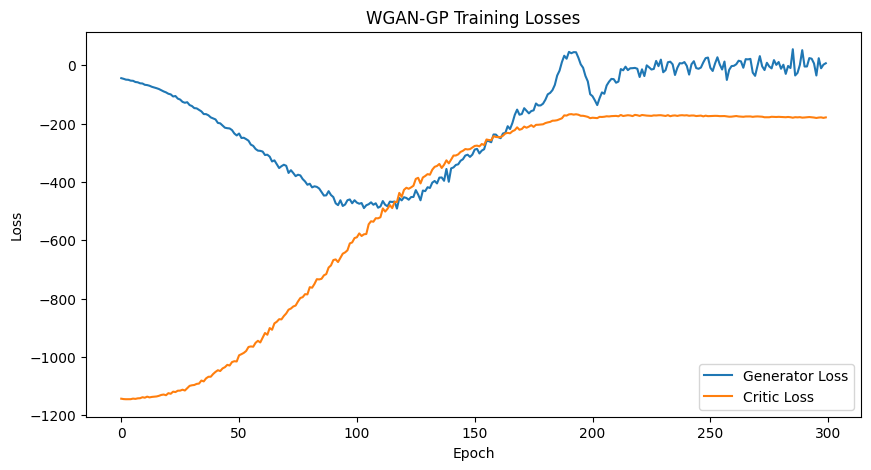

In [35]:
# Step 8: Plot generator and critic losses

plt.figure(figsize=(10, 5))
plt.plot(gen_losses, label="Generator Loss")
plt.plot(critic_losses, label="Critic Loss")
plt.legend()
plt.title("WGAN-GP Training Losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


### Step 9 : Save Model

In [36]:
# (Optional) Save models after training
torch.save(gen.state_dict(), "generator_cif.pth")
torch.save(critic.state_dict(), "critic_cif.pth")


### Step 10 :  sample new CIF vectors after training

In [37]:
# Step 1: Load your trained generator

gen = Generator()
gen.load_state_dict(torch.load("generator_cif.pth", map_location=torch.device('cpu')))
gen.eval()

# Step 2: Generate fake CIF feature vectors

n_samples = 10  # Number of fake crystals to generate
noise_dim = 128

z = torch.randn(n_samples, noise_dim)
with torch.no_grad():
    fake_vectors = gen(z)  # shape (n_samples, 46)

fake_vectors = fake_vectors.numpy()


C:\Users\Kered\AppData\Local\Temp\ipykernel_2188\3298357415.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gen.load_state_dict(torch.load("generator_cif.pth", map_locat

* Load your trained Generator

* Sample random noise

* Pass through Generator to get fake CIF feature vectors

### Step 11 Decode back to real CIF structures

In [41]:
from pymatgen.core import Lattice, Structure, Element

def decode_vector_to_structure(vector, max_atoms=10):
    """
    Decode a generated vector back into a pymatgen Structure.
    """
    # Lattice parameters
    a, b, c, alpha, beta, gamma = vector[:6]

    # Sanitize lattice parameters (to avoid unphysical results)
    a = max(a, 1.0)
    b = max(b, 1.0)
    c = max(c, 1.0)
    alpha = min(max(alpha, 10), 170)
    beta = min(max(beta, 10), 170)
    gamma = min(max(gamma, 10), 170)

    lattice = Lattice.from_parameters(a, b, c, alpha, beta, gamma)


    # Atom features
    atom_features = vector[6:].reshape((max_atoms, 4))  # [atomic_number, x, y, z]

    species = []
    coords = []

    for atom in atom_features:
        atomic_number, x, y, z = atom
        if atomic_number < 1:
            continue  # Skip padding zeros

        try:
            element = Element.from_Z(int(round(atomic_number)))
            species.append(element.symbol)
            coords.append([x % 1, y % 1, z % 1])  # Wrap fractional coordinates between 0-1
        except:
            continue  # Skip invalid atomic numbers

    if len(species) == 0:
        return None  # Skip empty structures

    structure = Structure(lattice, species, coords)
    return structure


* First 6 numbers are lattice info

* Next groups of 4 numbers = (atomic number, x, y, z)

* If atomic number is invalid (< 1), we skip

* Build a pymatgen Structure safely

### Step 12 Save generated structures as CIF files

In [42]:
# Step 3: Save all generated structures

output_dir = "generated_cif_files"
os.makedirs(output_dir, exist_ok=True)

for idx, vec in enumerate(fake_vectors):
    structure = decode_vector_to_structure(vec)
    if structure is not None:
        filename = os.path.join(output_dir, f"fake_crystal_{idx}.cif")
        structure.to(filename=filename)
        print(f"✅ Saved {filename}")
    else:
        print(f"⚠️ Skipped empty structure {idx}")


✅ Saved generated_cif_files\fake_crystal_0.cif
✅ Saved generated_cif_files\fake_crystal_1.cif
✅ Saved generated_cif_files\fake_crystal_2.cif
✅ Saved generated_cif_files\fake_crystal_3.cif
✅ Saved generated_cif_files\fake_crystal_4.cif
✅ Saved generated_cif_files\fake_crystal_5.cif
✅ Saved generated_cif_files\fake_crystal_6.cif
✅ Saved generated_cif_files\fake_crystal_7.cif
✅ Saved generated_cif_files\fake_crystal_8.cif
✅ Saved generated_cif_files\fake_crystal_9.cif


c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\pymatgen\core\periodic_table.py:221: UserWarning: No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(


* Each fake crystal is saved as a .cif file

* Skips invalid structures (e.g., 0 atoms)

### Step 13 Validation script
- analyze your generated CIFs and give scores like:

 * Lattice volume
 * Number of atoms
 * Are all atomic numbers realistic?

In [1]:
import os
import pandas as pd
from pymatgen.core import Structure

def validate_cif_folder(folder_path, output_csv="validation_report.csv"):
    """
    Validate all CIFs in a folder.

    Args:
        folder_path (str): Path to folder containing CIFs
        output_csv (str): Path to save validation report CSV

    Returns:
        pd.DataFrame: Validation results
    """
    results = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".cif"):
            path = os.path.join(folder_path, filename)
            try:
                structure = Structure.from_file(path)

                # Lattice volume
                volume = structure.lattice.volume

                # Number of atoms
                num_atoms = len(structure.sites)

                # Atomic numbers
                atomic_numbers = [site.specie.number for site in structure.sites]
                invalid_atomic_numbers = [Z for Z in atomic_numbers if Z < 1 or Z > 92]

                result = {
                    "filename": filename,
                    "volume": volume,
                    "num_atoms": num_atoms,
                    "invalid_atoms": len(invalid_atomic_numbers),
                    "valid": len(invalid_atomic_numbers) == 0
                }

                results.append(result)

            except Exception as e:
                print(f"⚠️ Error reading {filename}: {e}")
                results.append({
                    "filename": filename,
                    "volume": None,
                    "num_atoms": None,
                    "invalid_atoms": None,
                    "valid": False
                })

    df = pd.DataFrame(results)
    df.to_csv(output_csv, index=False)
    print(f"✅ Validation report saved to {output_csv}")
    return df

# ----------------------------------------------------------
# Usage Example:

if __name__ == "__main__":
    folder = "generated_cif_files"  # Your folder
    report = validate_cif_folder(folder)
    display(report)


✅ Validation report saved to validation_report.csv


c:\Users\Kered\GAN_Mastery\.venv\lib\site-packages\pymatgen\core\periodic_table.py:221: UserWarning: No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(


,filename,volume,num_atoms,invalid_atoms,valid
0,fake_crystal_0.cif,579.695129,10,0,True
1,fake_crystal_1.cif,924.259424,10,0,True
2,fake_crystal_2.cif,918.870436,10,0,True
3,fake_crystal_3.cif,907.613048,10,0,True
4,fake_crystal_4.cif,858.818233,10,0,True
5,fake_crystal_5.cif,886.513622,10,0,True
6,fake_crystal_6.cif,473.044636,10,0,True
7,fake_crystal_7.cif,1010.656853,10,0,True
8,fake_crystal_8.cif,612.072115,10,0,True
9,fake_crystal_9.cif,173.777433,10,0,True


### Steps 14 Crystal Toolkit

In [ ]:
pip install crystal-toolkit


In [ ]:
git clone https://github.com/materialsproject/crystaltoolkit.git
cd crystaltoolkit
pip install -e .



In [12]:
from crystal_toolkit.helpers.pythreejs_renderer import StructureMoleculeComponent
from pymatgen.core import Structure
import os

# Step 1: Load a fake crystal structure
cif_path = os.path.join("generated_cif_files", "fake_crystal_0.cif")
structure = Structure.from_file(cif_path)

# Step 2: Create a Crystal Toolkit component
structure_component = StructureMoleculeComponent(structure)

# Step 3: Display inside the notebook
structure_component.show()


ModuleNotFoundError: No module named 'crystal_toolkit'

* Load your .cif file into a pymatgen Structure
* Create a Crystal Toolkit StructureMoleculeComponent
* show() embeds a live 3D viewer inside your Notebook (you can rotate, zoom, etc.)

Loop multiple cristal

In [ ]:
import random

cif_files = os.listdir("generated_cif_files")
random_cif = random.choice(cif_files)
structure = Structure.from_file(os.path.join("generated_cif_files", random_cif))
StructureMoleculeComponent(structure).show()


In [7]:
!pip install crystal-toolkit



  Using cached crystal_toolkit-2023.10.9-py3-none-any.whl.metadata (18 kB)
  Using cached crystaltoolkit-extension-0.6.0.tar.gz (2.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [81 lines of output]
        Using cached jupyter_packaging-0.7.12-py2.py3-none-any.whl.metadata (996 bytes)
        Using cached jupyterlab-3.6.8-py3-none-any.whl.metadata (12 kB)
        Using cached setuptools-75.3.2-py3-none-any.whl.metadata (6.9 kB)
        Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
        Using cached ipython-8.12.3-py3-none-any.whl.metadata (5.7 kB)
        Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
        Using cached tornado-6.4.2-cp38-abi3-win_amd64.whl.metadata (2.6 kB)
        Using cached jupyter_core-5.7.2-py3-none-any.whl.metadata (3.4 kB)
        Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
        Using cached jupyter_server-2.14.2-py3-none-any.whl.metadata (8.4 kB)
        Using cached jupyter_ydoc-0.2.5-py3-none-any.whl.metadata (2.2 kB)
        U